In [1]:
import kagglehub
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Himanshu\.cache\kagglehub\datasets\kartik2112\fraud-detection\versions\1


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
train_data = pd.read_csv("C:/Users/Himanshu/Desktop/Codesoft/fraudTrain.csv")
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
test_data = pd.read_csv("C:/Users/Himanshu/Desktop/Codesoft/fraudTest.csv")
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
train_data.shape

(1296675, 23)

In [7]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [9]:
test_data.shape

(555719, 23)

In [10]:
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [12]:
train_data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [13]:
test_data['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [14]:
non_fraud = train_data[train_data['is_fraud']==0]
fraud = train_data[train_data['is_fraud']==1]

In [15]:
non_fraud_test = test_data[test_data['is_fraud']==0]
fraud_test = test_data[test_data['is_fraud']==1]

In [16]:
non_fraud.shape, non_fraud_test.shape

((1289169, 23), (553574, 23))

In [17]:
fraud.shape, fraud_test.shape

((7506, 23), (2145, 23))

In [18]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(7506, 23)

In [19]:
non_fraud_test = non_fraud_test.sample(fraud_test.shape[0])
non_fraud_test.shape

(2145, 23)

In [20]:
frames = [fraud, non_fraud]
new_train_data = pd.concat(frames)

In [21]:
frames = [fraud_test, non_fraud_test]
new_test_data = pd.concat(frames)

In [22]:
new_train_data
##this is Our new balances and filtered train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086261,1086261,2020-03-27 17:21:17,4294040533480516,"fraud_Nienow, Barrows and Romaguera",personal_care,40.03,Gail,Weaver,F,979 Stewart Lake,...,33.4130,-81.6900,2206,Biomedical scientist,1986-12-31,372fa659899dd8872a0635261b31f724,1364404877,32.543352,-81.281430,0
149017,149017,2019-03-21 16:28:25,4809701904914,fraud_Renner Ltd,home,16.66,Sabrina,Nolan,F,312 Eric Expressway Apt. 014,...,32.4204,-85.0796,59744,Chemical engineer,1984-02-07,ac72555c175999232ef1900ce9795afa,1332347305,32.897243,-85.835037,0
682180,682180,2019-10-18 11:05:58,2703186189652095,"fraud_Mosciski, Gislason and Mertz",grocery_pos,172.82,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,3d2ff4249a27cdefb9e3b84bef997184,1350558358,36.972051,-80.853927,0
726869,726869,2019-11-06 17:35:10,4147608975828480,"fraud_Berge, Kautzer and Harris",personal_care,5.67,Edward,Tapia,M,354 Gutierrez Gateway,...,44.1111,-94.9134,914,Health and safety adviser,1944-07-26,28fa26951b544b04e9c1ee105d2e09b0,1352223310,44.775607,-95.121414,0


In [23]:
new_test_data
## this is our new balanced test data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411657,411657,2020-11-30 09:40:24,4841313716651064,fraud_Cummerata-Jones,gas_transport,71.31,Omar,Gay,M,2161 Blankenship Freeway,...,43.7185,-72.4439,140,"Development worker, community",1989-10-28,bcfef76073a90d5771486bb710ddd8c6,1385804424,43.613492,-71.521687,0
257025,257025,2020-09-23 05:33:59,2288813824604479,fraud_Kiehn Inc,grocery_pos,164.42,Barbara,Norman,F,6278 Stephanie Unions,...,40.8265,-73.9383,1577385,Herbalist,1981-08-29,3920293ed59fa1c0e7021522fbb76c77,1379914439,41.143700,-74.664413,0
446383,446383,2020-12-07 19:03:55,4961003488432306,fraud_Bernier and Sons,kids_pets,33.42,Stacy,Walsh,F,324 Donna Ridge Suite 651,...,40.6284,-76.1950,1606,Ecologist,1966-05-10,6aa75b0e82db83239284dc3ddbdf344e,1386443035,40.600879,-75.367679,0
345663,345663,2020-11-01 19:28:00,36721445180895,fraud_Hilpert-Conroy,kids_pets,5.42,Cesar,Smith,M,901 Ariel Points,...,42.4999,-74.6117,1666,Diagnostic radiographer,1968-07-01,bec007bfb70e65b697ebd8339e6c096b,1383334080,41.597007,-73.623470,0


In [24]:
7506*2

15012

In [25]:
new_train_data['is_fraud'].value_counts()

is_fraud
1    7506
0    7506
Name: count, dtype: int64

In [26]:
new_test_data['is_fraud'].value_counts()

is_fraud
1    2145
0    2145
Name: count, dtype: int64

In [27]:
X_train = new_train_data.drop('is_fraud',axis =1)
Y_train = new_train_data['is_fraud']

In [28]:
X_train.shape

(15012, 22)

In [29]:
Y_train.shape

(15012,)

In [30]:
X_test = new_test_data.drop('is_fraud',axis = 1)
Y_test = new_test_data['is_fraud']

In [31]:
X_test.shape

(4290, 22)

In [32]:
Y_test.shape

(4290,)

In [33]:
type(X_test)

pandas.core.frame.DataFrame

In [34]:
X_train.head().dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
dtype: object

In [35]:
X_train.to_csv('ABC.csv')

PermissionError: [Errno 13] Permission denied: 'ABC.csv'

In [36]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Copy the dataframe to avoid modifying the original
X_train_processed = X_train.copy()

# Convert date columns ('trans_date_trans_time' and 'dob') to Unix timestamp (int64 first, then cast)
X_train_processed['trans_date_trans_time'] = pd.to_datetime(X_train_processed['trans_date_trans_time']).astype('int64') / 10**9
X_train_processed['dob'] = pd.to_datetime(X_train_processed['dob']).astype('int64') / 10**9

# Apply Label Encoding to the object columns
label_enc = LabelEncoder()

# List of object columns
object_columns = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'trans_num']

# Label encode each column
for col in object_columns:
    X_train_processed[col] = label_enc.fit_transform(X_train_processed[col])

# Convert int64 columns to float64
X_train = X_train_processed.astype(np.float64)

# Check the new types of columns
X_train.dtypes


Unnamed: 0               float64
trans_date_trans_time    float64
cc_num                   float64
merchant                 float64
category                 float64
amt                      float64
first                    float64
last                     float64
gender                   float64
street                   float64
city                     float64
state                    float64
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                      float64
dob                      float64
trans_num                float64
unix_time                float64
merch_lat                float64
merch_long               float64
dtype: object

In [37]:
X_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
2449,2449.0,1.546391e+09,4.613315e+12,543.0,4.0,281.06,157.0,303.0,1.0,544.0,...,28611.0,35.9946,-81.7266,885.0,425.0,590284800.0,13625.0,1.325466e+09,36.430124,-81.179483
2472,2472.0,1.546394e+09,3.401870e+14,285.0,2.0,11.52,248.0,179.0,0.0,280.0,...,78208.0,29.4400,-98.4590,1595797.0,228.0,-289612800.0,11043.0,1.325469e+09,29.819364,-99.142791
2523,2523.0,1.546398e+09,3.401870e+14,196.0,4.0,276.31,248.0,179.0,0.0,280.0,...,78208.0,29.4400,-98.4590,1595797.0,228.0,-289612800.0,10890.0,1.325474e+09,29.273085,-98.836360
2546,2546.0,1.546400e+09,4.613315e+12,162.0,2.0,7.03,157.0,303.0,1.0,544.0,...,28611.0,35.9946,-81.7266,885.0,425.0,590284800.0,3343.0,1.325475e+09,35.909292,-82.091010
2553,2553.0,1.546401e+09,3.401870e+14,328.0,4.0,275.73,248.0,179.0,0.0,280.0,...,78208.0,29.4400,-98.4590,1595797.0,228.0,-289612800.0,7123.0,1.325477e+09,29.786426,-98.683410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086261,1086261.0,1.585330e+09,4.294041e+15,453.0,10.0,40.03,129.0,455.0,0.0,967.0,...,29809.0,33.4130,-81.6900,2206.0,48.0,536371200.0,3199.0,1.364405e+09,32.543352,-81.281430
149017,149017.0,1.553186e+09,4.809702e+12,512.0,6.0,16.66,287.0,312.0,0.0,312.0,...,36869.0,32.4204,-85.0796,59744.0,72.0,444960000.0,10131.0,1.332347e+09,32.897243,-85.835037
682180,682180.0,1.571397e+09,2.703186e+15,442.0,4.0,172.82,162.0,18.0,0.0,568.0,...,28654.0,36.0788,-81.1781,3495.0,370.0,573868800.0,3566.0,1.350558e+09,36.972051,-80.853927
726869,726869.0,1.573062e+09,4.147609e+15,44.0,10.0,5.67,115.0,419.0,1.0,365.0,...,56019.0,44.1111,-94.9134,914.0,217.0,-802656000.0,2352.0,1.352223e+09,44.775607,-95.121414


In [38]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Copy the dataframe to avoid modifying the original
X_test_processed = X_test.copy()

# Convert date columns ('trans_date_trans_time' and 'dob') to Unix timestamp (int64 first, then cast)
X_test_processed['trans_date_trans_time'] = pd.to_datetime(X_test_processed['trans_date_trans_time']).astype('int64') / 10**9
X_test_processed['dob'] = pd.to_datetime(X_test_processed['dob']).astype('int64') / 10**9

# Apply Label Encoding to the object columns
label_enc = LabelEncoder()

# List of object columns
object_columns = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'trans_num']

# Label encode each column
for col in object_columns:
    X_test_processed[col] = label_enc.fit_transform(X_test_processed[col])

# Convert int64 columns to float64
X_test = X_test_processed.astype(np.float64)

# Check the new types of columns
X_test.dtypes


Unnamed: 0               float64
trans_date_trans_time    float64
cc_num                   float64
merchant                 float64
category                 float64
amt                      float64
first                    float64
last                     float64
gender                   float64
street                   float64
city                     float64
state                    float64
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                      float64
dob                      float64
trans_num                float64
unix_time                float64
merch_lat                float64
merch_long               float64
dtype: object

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X_train

array([[-1.63989804, -1.74895026, -0.32024407, ..., -1.75481886,
        -0.40769166,  0.62916214],
       [-1.63983875, -1.74876667, -0.31998751, ..., -1.75463512,
        -1.68243632, -0.64161609],
       [-1.63970727, -1.74841672, -0.31998751, ..., -1.75428487,
        -1.78777462, -0.61993824],
       ...,
       [ 0.11240999,  0.12328794, -0.31818089, ...,  0.12544839,
        -0.30319254,  0.65219295],
       [ 0.2276157 ,  0.24794768, -0.31707657, ...,  0.25021164,
         1.2015575 , -0.35713183],
       [ 0.37114012,  0.40372354, -0.32022432, ...,  0.40611685,
         0.52538512,  1.07097684]])

In [41]:
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [42]:
X_train.shape

(15012, 22)

In [43]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [44]:
X_train.shape, X_test.shape

((15012, 22, 1), (4290, 22, 1))

In [61]:
epochs = 30
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 21, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 21, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 21, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 20, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 20, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │          81,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,689 (338.63 KB)

 Trainable params: 86,497 (337.88 KB)

 Non-trainable params: 192 (768.00 B)

In [63]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [64]:
history = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6007 - loss: 1.0682 - val_accuracy: 0.7853 - val_loss: 0.4678
Epoch 2/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7400 - loss: 0.6188 - val_accuracy: 0.8315 - val_loss: 0.4420
Epoch 3/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7494 - loss: 0.5907 - val_accuracy: 0.8417 - val_loss: 0.4283
Epoch 4/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7757 - loss: 0.5192 - val_accuracy: 0.8522 - val_loss: 0.4140
Epoch 5/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7939 - loss: 0.4991 - val_accuracy: 0.8559 - val_loss: 0.3990
Epoch 6/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8009 - loss: 0.4747 - val_accuracy: 0.8552 - val_loss: 0.3883
Epoch 7/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8202 - loss: 0.4411 - val_accuracy: 0.8564 - val_loss: 0.3793
Epoch 8/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8227 - loss: 0.4260 - val_accuracy: 0

In [65]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

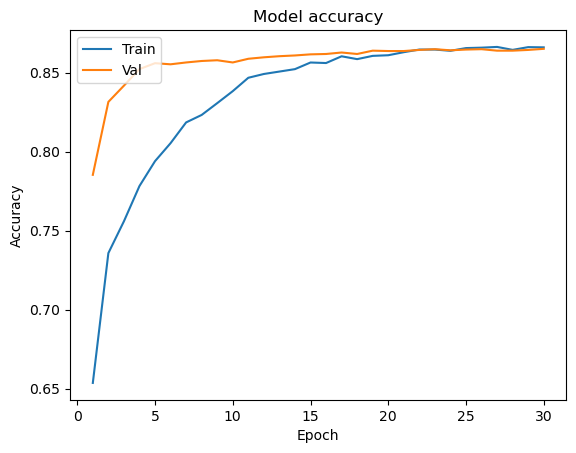

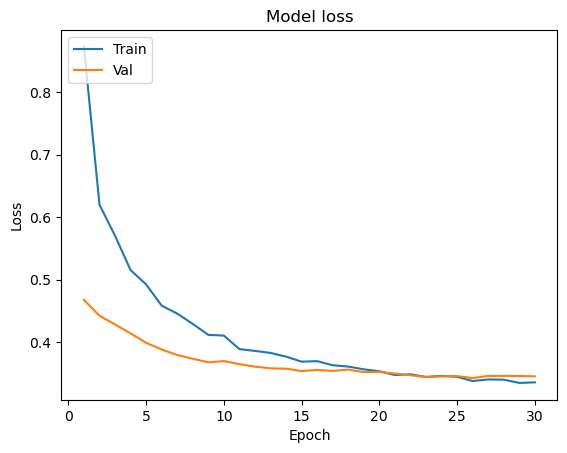

In [66]:
plot_learningCurve(history, epochs)

Epoch 1/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5304 - loss: 1.0839 - val_accuracy: 0.6012 - val_loss: 0.6234
Epoch 2/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5946 - loss: 0.8141 - val_accuracy: 0.6611 - val_loss: 0.5832
Epoch 3/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6095 - loss: 0.7248 - val_accuracy: 0.6930 - val_loss: 0.5681
Epoch 4/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6278 - loss: 0.6749 - val_accuracy: 0.7051 - val_loss: 0.5587
Epoch 5/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6522 - loss: 0.6349 - val_accuracy: 0.7249 - val_loss: 0.5521
Epoch 6/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6661 - loss: 0.6130 - val_accuracy: 0.7305 - val_loss: 0.5421
Epoch 7/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6875 - loss: 0.5871 - val_accuracy: 0.7331 - val_loss: 0.5347
Epoch 8/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6952 - loss: 0.5809 - val_accuracy: 0.

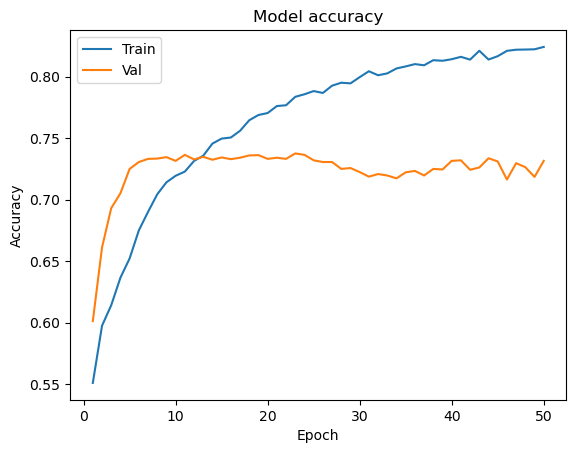

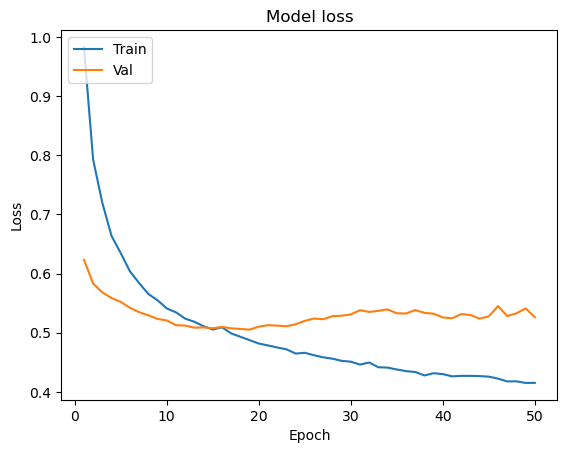

In [51]:
epochs = 50
model1 = Sequential()
model1.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model1.add(BatchNormalization())
model1.add(MaxPool1D(2))
model1.add(Dropout(0.2))

model1.add(Conv1D(64, 2, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool1D(2))
model1.add(Dropout(0.5))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test), verbose=1)
plot_learningCurve(history, epochs)

In [67]:
model2 = tf.keras.Sequential([keras.layers.Dense(128 , activation = 'relu' , input_dim = X_train.shape[1]),
                             keras.layers.Dense(64, activation = 'relu'),
                             keras.layers.Dense(32, activation = 'relu'),
                             keras.layers.Dense(1 , activation = 'sigmoid')])
model2.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 128)                 │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,313 (52.00 KB)

 Trainable params: 13,313 (52.00 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model2.compile(loss = 'binary_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [57]:
!rm -rf ./log/
import datetime, os
logdir = os.path.join("log",
                      datetime.datetime.now().
                      strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,
                                                      histogram_freq =1)

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [69]:
r = model2.fit(X_train, Y_train, batch_size = 32,epochs = 50 , validation_data= (X_test, Y_test),  callbacks = [tensorboard_callback])

Epoch 1/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7758 - loss: 0.4927 - val_accuracy: 0.8357 - val_loss: 0.4172
Epoch 2/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8582 - loss: 0.3656 - val_accuracy: 0.8161 - val_loss: 0.4437
Epoch 3/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8673 - loss: 0.3379 - val_accuracy: 0.8128 - val_loss: 0.4303
Epoch 4/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8724 - loss: 0.3150 - val_accuracy: 0.8266 - val_loss: 0.4159
Epoch 5/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8769 - loss: 0.2948 - val_accuracy: 0.8168 - val_loss: 0.4633
Epoch 6/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8850 - loss: 0.2814 - val_accuracy: 0.7979 - val_loss: 0.5402
Epoch 7/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8945 - loss: 0.2623 - val_accuracy: 0.7967 - val_loss: 0.5598
Epoch 8/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9035 - loss: 0.2400 - val_accuracy: 0.

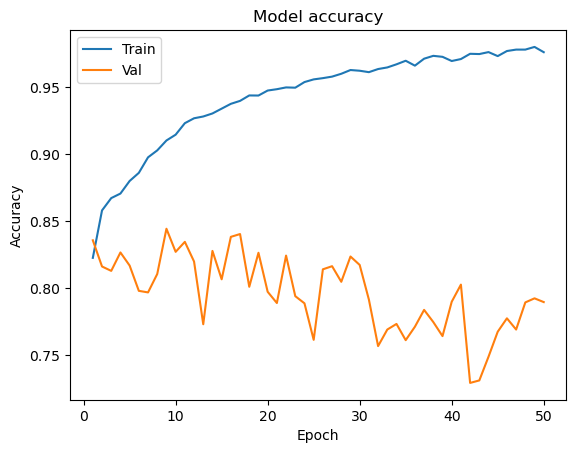

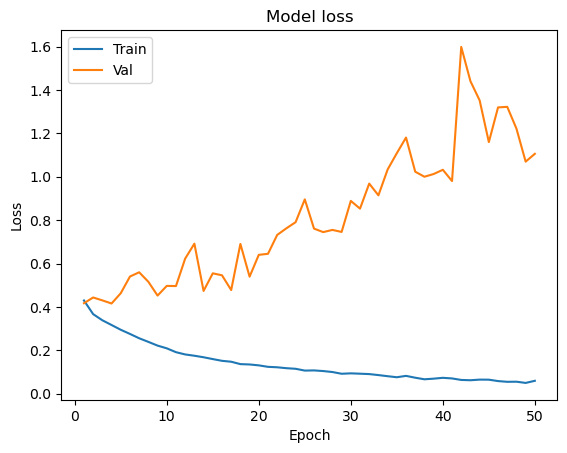

In [70]:
plot_learningCurve(r, 50)

Epoch 1/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5757 - loss: 1.0136 - val_accuracy: 0.8072 - val_loss: 0.4449
Epoch 2/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7361 - loss: 0.6303 - val_accuracy: 0.8424 - val_loss: 0.4245
Epoch 3/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7597 - loss: 0.5645 - val_accuracy: 0.8445 - val_loss: 0.4193
Epoch 4/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7881 - loss: 0.5010 - val_accuracy: 0.8469 - val_loss: 0.4089
Epoch 5/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7964 - loss: 0.4736 - val_accuracy: 0.8487 - val_loss: 0.3966
Epoch 6/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8060 - loss: 0.4562 - val_accuracy: 0.8494 - val_loss: 0.3868
Epoch 7/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8217 - loss: 0.4296 - val_accuracy: 0.8503 - val_loss: 0.3814
Epoch 8/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8311 - loss: 0.4109 - val_accuracy: 0.

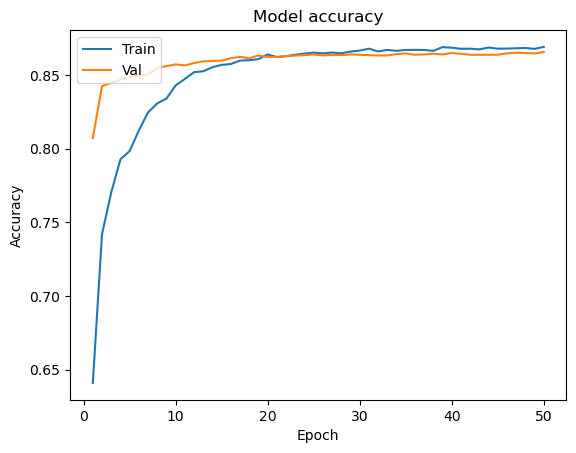

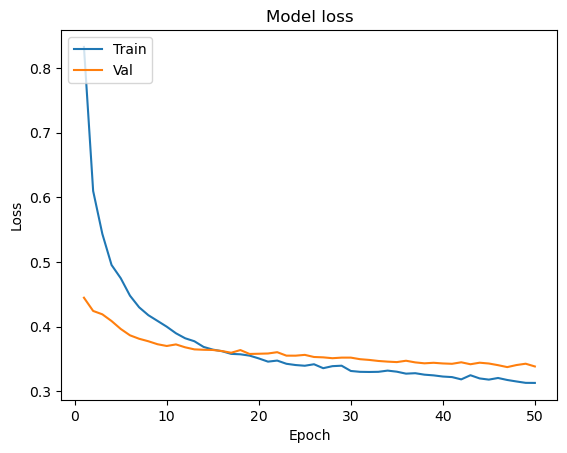

In [73]:
epochs = 50
model3 = Sequential()
model3.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Conv1D(64, 2, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model3.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test), verbose=1)
plot_learningCurve(history, epochs)